# How to calculate summary statistics?

Follow along with this [article](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)  This notebook will also contain some supplemental information to help you better understand basic summary statistics.

First thing we want to do is to import the pandas library.

In [ ]:
# import the pandas library and use the alias 'pd'
import pandas as pd

We are going to be working with the titanic dataset found [here.](https://github.com/codinglikeagirl42/EDApt2Exercises/blob/e4a6dabdf679668c0c836e35e9c64555b9fcae65/data/titanic.csv) It is in csv format and consists fo the following data columns:


- PassengerId: Id of every passenger.
- Survived: Value of 0 for not survived and 1 for survived.
- Pclass: There are 3 classes: Class 1, Class 2 and Class 3.
- Name: Name of passenger.
- Sex: Gender of passenger.
- Age: Age of passenger.
- SibSp: Number of siblings / spouses on the Titanic
- Parch: Number of parents / children on the Titanic
- Ticket: Ticket number of passenger.
- Fare: Indicating the fare.
- Cabin: The cabin of passenger.
- Embarked: Port of Embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton)

Let's load the data into a data frame and see what the data looks like. To make things easier, inside the folder that holds your Notebooks for class, create a folder called data to hold your data sets.  This will make the path data/your_data_set_name.csv to read your data into a data frame.

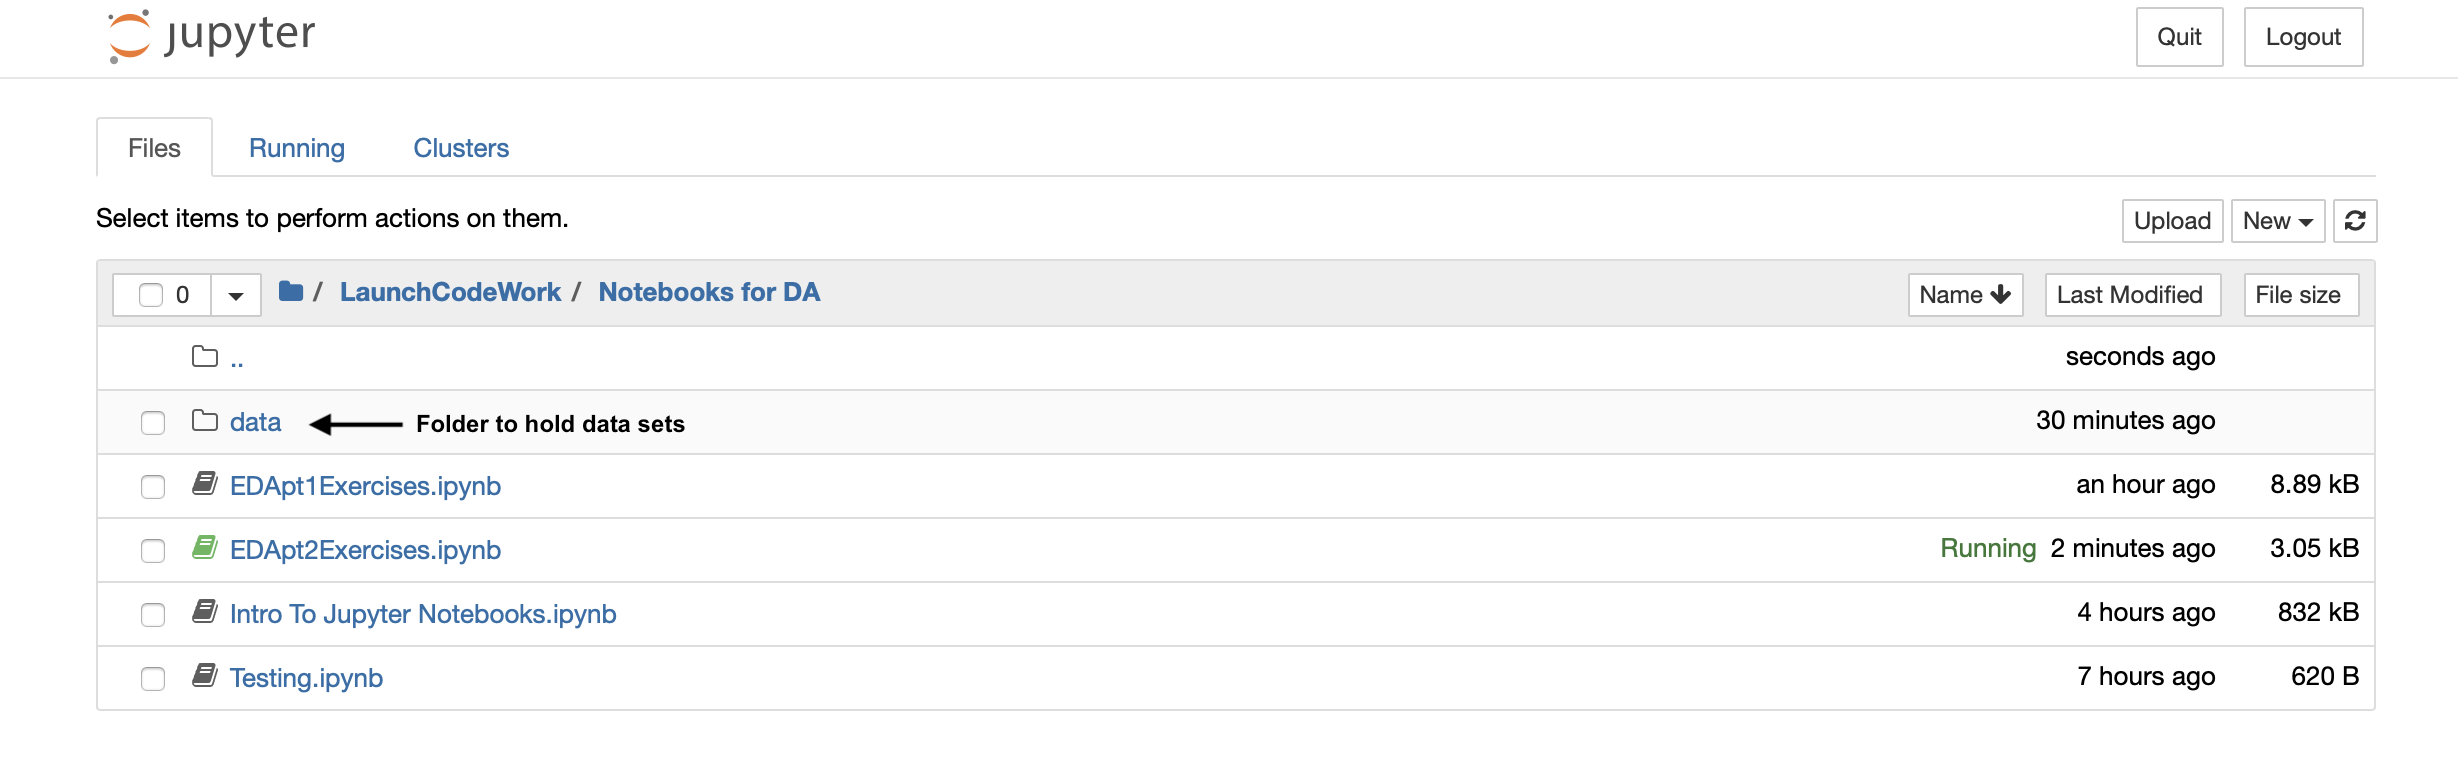

In [ ]:
#read titantic data set into a data frame
titanic = pd.read_csv("data/titanic.csv")

#although we listed the column names above, write the code to return the name of all of your columns in the dataset
titanic.columns

In [ ]:
# print the first 5 rows from the dataframe
titanic.head()

What are some of your observations from looking at the data so far? Questions you would like to explore?<br><br><br><br><br>







In [ ]:
#.info() returns: 
#name of the column, Non-null Count meaning how many non-null values their are in that column and Dtype
#int64 means int value, float64 means float value, object means string value.
titanic.info()

By default statistical anaysis is run on numerical values.  

Looking at the data above what do you notice about Age? Cabin? How might these observations influence the questions asked?<br><br>

Any other observations?
<br><br><br>

## Aggregating statistics

### Calculating Mean, Median, Mode

#### Mean: is the sum of the values divided by the number of values.

In [ ]:
#What is the mean age of the Titanic passengers?
titanic["Age"].mean()

We can also get the mean for all columns. 

In [ ]:
#mean for all columns
titanic.mean()

Are mean and average the same thing? <br><br>

In [ ]:
#calculate the average age of a titantic passenger
titanic["Age"].sum()/891

How are mean and average different and why is this important? <br><br><br><br>

#### Median: Is the middle value when all the numbers are put in order, dividing the sample into two halves.  

Example: (23, 46, 55, 78, 99)<br> 
The Median of the above example is 55. 

In [ ]:
# What is the median age and ticket fare price of the Titanic passengers?
titanic[["Age", "Fare"]].median()

#### Mode: The most frequent value(s) in a sample

In [ ]:
# What is the mode age and fare for the titanic dateset?

titanic[["Age", "Fare"]].mode()

Note the difference between Mean, Medium and Mode.  Why is this important? Can you think of times you would what to use one over the others?<br><br><br><br><br>






We can use the .describe() funciton to display some basic statistics for all numeric columns:

In [ ]:
# Summary statistics for all columns in a dataset
titanic.describe()

In [ ]:
# Summary statistics for just the Age and Fare columns
titanic[["Age", "Fare"]].describe()

Notice that medium and mode are not included in .describe()

Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the [DataFrame.agg() method:](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html#pandas.DataFrame.agg)

In [ ]:
titanic.agg(
   ...:     {
   ...:         "Age": ["min", "max", "median", "skew"],
   ...:         "Fare": ["min", "max", "median", "mean"],
   ...:     }
   ...: )

## Aggregating statistics grouped by category

Calculating a given statistic (e.g. mean age) for each category in a column (e.g. male/female in the Sex column) is a common pattern. The groupby method is used to support this type of operations. 

In [ ]:
# What is the average age for male versus female Titanic passengers?
titanic[["Sex", "Age"]].groupby("Sex").mean()

In [ ]:
# What is the survival rate of men verses female Titanic Passengers?



In [ ]:
# Other questions you might want to use the above method with?









In the previous examples, we explicitly selected the 2 columns first. If not, the mean method is applied to each column containing numerical columns:

In [ ]:
titanic.groupby("Sex").mean()

It does not make much sense to get the average value of the Pclass. if we are only interested in the average age for each gender, the selection of columns (rectangular brackets [] as usual) is supported on the grouped data as well:

In [ ]:
titanic.groupby("Sex")["Age"].mean()

In [ ]:
# What is the mean ticket fare price for each of the sex and cabin class combinations?
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

In [ ]:
# What other questions could you answer with this method?






## Count number of records by category

The value_counts() method counts the number of records for each category in a column.

In [ ]:
# What is the number of passengers in each of the cabin classes?
titanic["Pclass"].value_counts()

The function is a shortcut, as it is actually a groupby operation in combination with counting of the number of records within each group:

In [ ]:
titanic.groupby("Pclass")["Pclass"].count()

In [ ]:
# Using the value_counts method what else could you count?




